In [8]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Importing Data set
df = pd.read_pickle(r'C:\Users\steph\OneDrive\Documents\Sept 2022 Worl University Rankings\02 Data\Prepared Data\Rankings_w_category.pkl')

In [3]:
# Examine Data
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,number_of_students,patents,score,year,world_rank_category_loc
0,986,University of Bucharest,Romania,1,237,567,218,845,804,645,871,44.04,2015,High Rank
1,962,University of Puerto Rico at Mayagüez,Puerto Rico,1,367,567,218,998,793,645,871,44.06,2015,High Rank
2,950,United Arab Emirates University,United Arab Emirates,1,367,521,218,994,851,812,689,44.08,2015,High Rank
3,928,University of Cyprus,Cyprus,1,367,567,218,820,896,645,816,44.10,2015,High Rank
4,93,University of Copenhagen,Denmark,1,101,101,60,85,66,101,101,44.15,2012,Low Rank


In [5]:
# Enabling visualizations
%matplotlib inline

<AxesSubplot:xlabel='quality_of_education', ylabel='world_rank'>

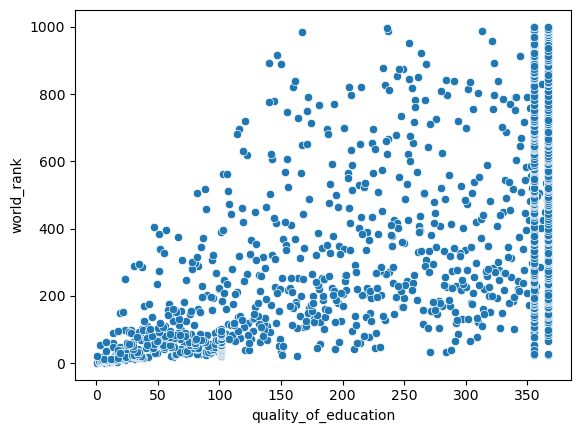

In [9]:
# Creating scatterplot
sns.scatterplot(data = df, x = 'quality_of_education', y = 'world_rank')


<AxesSubplot:xlabel='quality_of_faculty', ylabel='world_rank'>

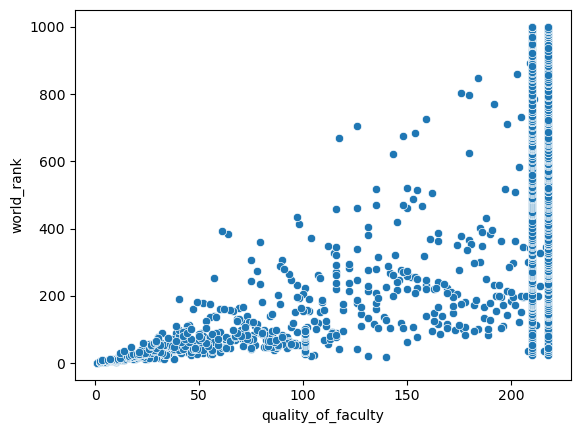

In [10]:
sns.scatterplot(data = df, x = 'quality_of_faculty', y = 'world_rank')

<AxesSubplot:xlabel='publications', ylabel='quality_of_faculty'>

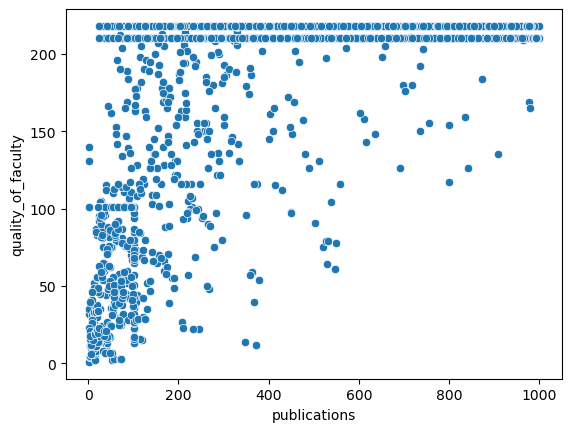

In [11]:
sns.scatterplot(data = df, x = 'publications', y = 'quality_of_faculty')

# Discussing scatterplots and hypothesis
Looking at the plots for variables quality_of_education and publications, there is a positive slope (very slight in the case of quality_of_faculty). But the plots show too many data points outside the slope, particularly in quality_of_education. In exercise 6.2 I looked at publications and world ranking, which there is definitely a correlation. I wanted to see the relationship of publications and quality_of_faculty. There is a trend but much of the data is above the line. Hypothesis: The quality of faculty has a positive relationship with the number of publications. 

In [12]:
# Reshape the variables into numpy arrays and put them into separate objects
x = df['publications'].values.reshape(-1,1)
y = df['quality_of_faculty'].values.reshape(-1,1)

In [13]:
# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
# Create a regression object
regression = LinearRegression()

In [15]:
# Fit the regression to the train set
regression.fit(x_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using x
y_predicted = regression.predict(x_test)

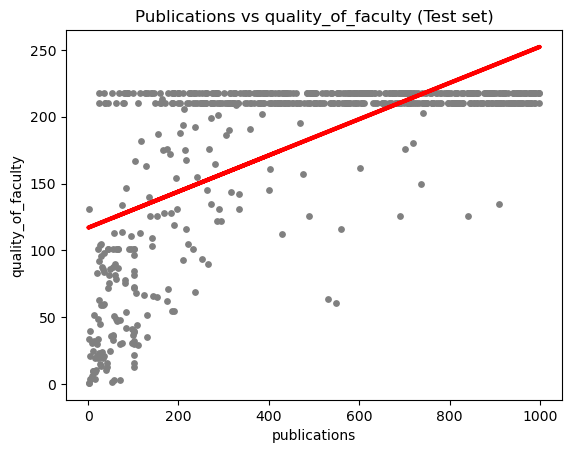

In [30]:
# Create a plot showing regression line from the model on the test set
plot_test = plt
plot_test.scatter(x_test, y_test, color="gray", s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Publications vs quality_of_faculty (Test set)')
plot_test.xlabel('publications')
plot_test.ylabel('quality_of_faculty')
plot_test.show()

# Discussing the test plot
Much of the data does not fall on or close to the regression line. There is a general upward trend to the data points but further study by checking the statistics is necessary.

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13529591]]
Mean squared error:  2458.837170251041
R2 score:  0.3992633644118828


In [35]:
# Compare statistics to predicted y values
y_predicted

array([[125.27891157],
       [226.75084771],
       [190.62683845],
       [221.33901112],
       [147.33214569],
       [126.4965748 ],
       [123.38476876],
       [168.57360433],
       [241.49810243],
       [194.82101181],
       [196.98574645],
       [244.60990848],
       [165.86768603],
       [126.4965748 ],
       [151.39102314],
       [200.77403206],
       [236.49215358],
       [151.25572722],
       [242.9863575 ],
       [189.67976704],
       [149.76747216],
       [166.67946152],
       [214.43891946],
       [184.13263453],
       [153.82634961],
       [239.19807188],
       [175.06780824],
       [250.69822464],
       [197.12104236],
       [130.69074817],
       [119.1905954 ],
       [192.65627717],
       [153.01457412],
       [212.40948074],
       [241.36280652],
       [141.51442135],
       [176.28547147],
       [173.98544092],
       [119.59648315],
       [146.38507429],
       [158.15581888],
       [227.96851095],
       [197.79752194],
       [210

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,49,125.278912
1,218,226.750848
2,210,190.626838
3,218,221.339011
4,218,147.332146
5,30,126.496575
6,76,123.384769
7,210,168.573604
8,218,241.498102
9,210,194.821012


In [38]:
# Predict.

y_predicted_train = regression.predict(x_train) # This is predicting X_train!

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13529591]]
Mean squared error:  2446.94773369936
R2 score:  0.403743402620497


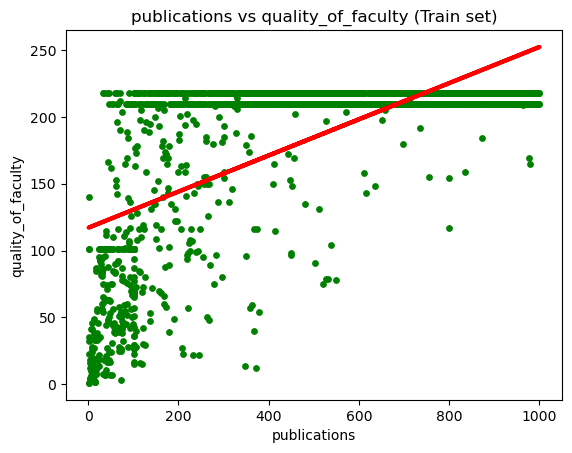

In [42]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('publications vs quality_of_faculty (Train set)')
plot_test.xlabel('publications')
plot_test.ylabel('quality_of_faculty')
plot_test.show()

# Discussing the models
Both the test and train come up with similar results. Unfortunately, the results contradict the hypothesis. Ths slope on both is positive but low. The root mean squared error is large showing that many of the data points are not close to the regression line, meaning that the regression line isn't an an accurate representation of the data. Both R2 scores (.39 and .40) are small also indicating the model isn't a good fit. 